In [1]:
import sys
import os
import subprocess
from math import *
import numpy as np
from datetime import *
from pylab import *
import matplotlib as mpl
from matplotlib.widgets import Slider, Button, RadioButtons
import matplotlib.pyplot as plt
from astropy.table import Table, Column 
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as patches
import scipy.misc as scimisc
import random
import requests
from io import BytesIO
from PIL import Image

In [2]:
RA  = 0.8121   # deg
Dec = 16.1456  # deg
fov = 10        # arcmin
angle = 43.
scale = 1.

# var d = 1.;
# if (unit=='arcmin') d=60.
# if (unit=='degree') d=3600.

npix = int(fov*60 / 0.250)

RA   = str(RA)
Dec  = str(Dec)
npix = str(npix)

url = "http://skyserver.sdss.org/dr12/SkyserverWS/ImgCutout/getjpeg?TaskName=Skyserver.Explore.Image&ra="+RA+"&dec="+Dec+"&scale=0.25&width="+npix+"&height="+npix;


response = requests.get(url)
img = Image.open(BytesIO(response.content))


In [3]:
def converIMAGE(img, angle=0., scale=1., size=64):
    
    if scale<1.:
        scale=1


    img_rot = scimisc.imrotate(img, -angle, interp='bilinear')

    img_rot = np.asarray(img_rot)

    N = img_rot.shape
    d = N[0]
    p =  int(d/scale)
    d1 = d/2-p/2
    d2 = d1 + p

    img_cut = img_rot[d1:d2, d1:d2, :]

    img = Image.fromarray(img_cut, 'RGB').resize((size,size))


#     img.save(outName, "JPEG")
    
    return img

/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imrotate` is deprecated!
`imrotate` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.rotate`` instead.
  import sys


(1, 64, 64, 3)

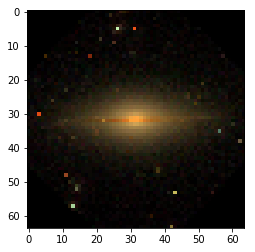

In [4]:
img_c = converIMAGE(img, angle=angle, scale=scale, size=64)
img_c.save('demo.jpg', "JPEG")

plt.imshow(img_c)

img_arr = np.asarray(img_c)

nx,ny,channels = img_arr.shape

img_arr = img_arr.reshape(1,nx,ny,channels)

img_arr.shape

In [15]:
import tensorflow as tf
from tensorflow.keras.models import  load_model

img_c = Image.open('demo.jpg')      
img_arr = np.asarray(img_c) 
nx,ny,channels = img_arr.shape 
img_arr = img_arr.reshape(1,nx,ny,channels) 
img_arr.shape  
img_arrr = tf.cast(img_arr, tf.float32)
img_arrr = tf.cast(img_arr, tf.float32) 



regression = load_model("CNN_inc_VGG6_regr_seed100.h5", compile=False)
classify = load_model("CNN_inc_VGG6_classify_seed100.h5", compile=False)
binary = load_model("CNN_inc_VGG6_binary.h5", compile=False)



In [16]:
inc_pr = regression.predict(img_arr)
inc_pc = classify.predict(img_arr)
inc_pc = np.argmax(inc_pc, axis=1) + 51
flag = binary.predict(img_arr)

In [17]:
print np.round(inc_pr[0][0]), inc_pc[0], flag[0]

81.0 87 [0.23492117 0.76507884]


## on ARP

In [ ]:
import sys
import os
import subprocess
from math import *
import numpy as np
from datetime import *
from pylab import *
import matplotlib as mpl
from matplotlib.widgets import Slider, Button, RadioButtons
import matplotlib.pyplot as plt
from astropy.table import Table, Column 
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as patches
import scipy.misc as scimisc
import random
import requests
from io import BytesIO
from PIL import Image

import tensorflow as tf
from tensorflow.keras.models import  load_model

regression = load_model("CNN_inc_VGG6_regr_seed100.h5")
classify = load_model("CNN_inc_VGG6_classify_seed100.h5")
binary = load_model("CNN_inc_VGG6_binary.h5")

img_c = Image.open('demo.jpg')      
img_arr = np.asarray(img_c) 
nx,ny,channels = img_arr.shape 
img_arr = img_arr.reshape(1,nx,ny,channels) 
img_arr.shape  
img_arrr = tf.cast(img_arr, tf.float32)
inc_pr = regression.predict(img_arrr) 
inc_pc = classify.predict(img_arrr) 
inc_pc = np.argmax(inc_pc, axis=1) + 51 
flag = binary.predict(img_arrr) 

print(np.round(inc_pr[0][0]), inc_pc[0], flag[0])